***Michael McCormack***

In the Week 04 file folder you'll find the anonymous New York op ed from September 5, 2018, together with samples of writings of the main suspects. 

Use any tools you like to figure out who wrote the op ed. If you can find more writings of these people, please send them my way.



How I approached this problem - 

Let me first say that this is a incredibly interesting problem that demonstrates a very relevant application of NLP.  I had a lot of fun doing this project. 

I began by doing some exploring on the internet.  I came across this idea of determining author based on sentence structure.  Below is an example of this idea used in a Kaggle competition.

https://www.kaggle.com/christopher22/stylometry-identify-authors-by-sentence-structure/notebook

Basically the idea is that you break down each training document by sentence and add a label for the author of each sentence.  

I start off by reading in the training files into pandas DataFrames.  I then add a column indicating the author Next I concatenate all the dataframes together so

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


import numpy as np
import re
import nltk


with open('Dan Coats.txt', 'r+') as in_file:
    textDan = in_file.read()
    sentsDan = nltk.sent_tokenize(textDan)
    
pdDan = pd.DataFrame({'sentence':sentsDan})
pdDan['author'] = 'Dan Coats'


with open('James Mattis.txt', 'r+') as in_file:
    textMattis = in_file.read()
    sentsMattis = nltk.sent_tokenize(textMattis)
    
pdMattis = pd.DataFrame({'sentence':sentsMattis})
pdMattis['author'] = 'James Mattis'


with open('John Kelly.txt', 'r+') as in_file:
    textKelly = in_file.read()
    sentsKelly = nltk.sent_tokenize(textKelly)
    
pdKelly = pd.DataFrame({'sentence':sentsKelly})
pdKelly['author'] = 'John Kelly'


with open('Kevin Hassett.txt', 'r+') as in_file:
    textHassett = in_file.read()
    sentsHassett = nltk.sent_tokenize(textHassett)
    
pdHassett = pd.DataFrame({'sentence':sentsHassett})
pdHassett['author'] = 'Kevin Hassett'

with open('Kirstjen Nielsen.txt', 'r+') as in_file:
    textNielsen = in_file.read()
    sentsNielsen = nltk.sent_tokenize(textNielsen)
    
pdNielsen = pd.DataFrame({'sentence':sentsNielsen})
pdNielsen['author'] = 'Kirstjen Nielsen'

with open('Larry Kudlow.txt', 'r+') as in_file:
    textKudlow = in_file.read()
    sentsKudlow = nltk.sent_tokenize(textKudlow)
    
pdKudlow = pd.DataFrame({'sentence':sentsKudlow})
pdKudlow['author'] = 'Larry Kudlow'


with open('Mike Pence.txt', 'r+') as in_file:
    textPence = in_file.read()
    sentsPence = nltk.sent_tokenize(textPence)
    
pdPence = pd.DataFrame({'sentence':sentsPence})
pdPence['author'] = 'Mike Pence'

with open('Mike Pompeo.txt', 'r+') as in_file:
    textPompeo = in_file.read()
    sentsPompeo = nltk.sent_tokenize(textPompeo)
    
pdPompeo = pd.DataFrame({'sentence':sentsPompeo})
pdPompeo['author'] = 'Mike Pompeo'



train = pd.DataFrame()
train = pd.concat([pdDan, pdMattis,pdKelly,pdHassett,pdNielsen,pdKudlow,pdPence,pdPompeo])


# Convert the author strings into numbers
#train['author'] = train['author'].apply(lambda x: possibleAuthors[x])
#print(train)

#print(train)
text = train['sentence'] # sentences
author = train['author'].tolist()
print("there are ", len(text), "sentences")





# Convert the author strings into numbers
#train['author'] = train['author'].apply(lambda x: possibleAuthors[x])
#print(train)



there are  1069 sentences


In [2]:


vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3)
vectors = vectorizer.fit_transform(text)
print(vectors.shape)


# tvect = TfidfVectorizer(min_df=1, max_df=1)
# X_train = tvect.fit_transform(text)

# #X_train, X_test, y_train, y_test = train_test_split(vectors, author, test_size=0.2, random_state=1337)


# svm = LinearSVC()
# svm.fit(X_train, author)

### Test the model
X_train, X_test, y_train, y_test = train_test_split(vectors, author, test_size=0.30, random_state=1337)
svm = LinearSVC()
svm.fit(X_train, y_train)


predictions = svm.predict(X_test)
#print(list(predictions[0:10]))
 
from sklearn.metrics import accuracy_score
print("The model is accurate: ", round((accuracy_score(y_test, predictions) *100),2), "% of the time.")

# predictions = svm.predict(X_test)
# print(list(predictions[0:10]))
# print(y_test[:10])






(1069, 2415)
The model is accurate:  73.21 % of the time.


In [3]:

opEd = pd.read_table("OpEd.txt", header =None)
opEd.columns = ['text']

test = opEd['text'].tolist()

X_test=vectorizer.transform(test)

# testVector = vectorizer.fit_transform(test)
# X_test=vectorizer.transform(test)
# print(vectors.shape)


predictions = svm.predict(X_test)

# predictedAuthor = mode(predictions)


predictedAuthordf = pd.DataFrame(predictions)
predictedAuthordf.columns = ['Author']
predictedAuthordf = predictedAuthordf['Author'].value_counts().reset_index()
predictedAuthordf = pd.DataFrame(predictedAuthordf)
predictedAuthordf.columns = ['Author','Count']
predictedAuthordf["Probability"] = predictedAuthordf["Count"]/(predictedAuthordf['Count'].sum())
predictedAuthordf["logLikelihood"] = np.log( predictedAuthordf["Probability"])

prediction = predictedAuthordf['logLikelihood'].idxmax()
predictedAuthor = predictedAuthordf.at[prediction,'Author']

print(predictedAuthordf,"\n\n")


#predictedAuthor = (list(possibleAuthors.keys())[list(possibleAuthors.values()).index(predictedAuthor)]) 
print("The predicted author is: ", predictedAuthor)





          Author  Count  Probability  logLikelihood
0   Larry Kudlow      7     0.259259      -1.349927
1     John Kelly      6     0.222222      -1.504077
2    Mike Pompeo      4     0.148148      -1.909543
3     Mike Pence      4     0.148148      -1.909543
4  Kevin Hassett      3     0.111111      -2.197225
5      Dan Coats      2     0.074074      -2.602690
6   James Mattis      1     0.037037      -3.295837 


The predicted author is:  Larry Kudlow


Visualizing prediction distribution

/home/shit/bin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


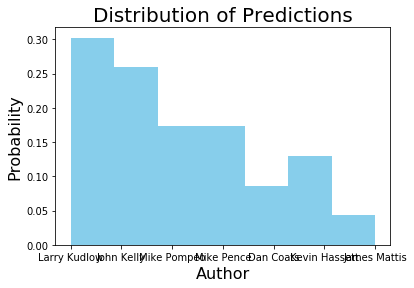

IndexError: tuple index out of range

In [4]:


bins = len(set(predictions))

plt.hist(predictions, color = "skyblue", normed=True, align="mid",bins= bins)
plt.xticks(range(bins))
plt.ylabel("Probability",fontsize=16)
plt.xlabel("Author",fontsize=16)
plt.title("Distribution of Predictions",fontsize=20)
plt.show()




c = collections.Counter(predictions)
c = sorted(c.items())
authors = [i[0] for i in c]
count = [i[1] for i in c]
probs = [i[2] for i in c]

suffixes = []
for item in authors:
    suffixes.append(item.split()[-1])
    
    

plt.bar(suffixes, probs)
plt.xlabel("Author",fontsize=16)
plt.ylabel("Sentences Attributed to Author (%) ",fontsize=16)
plt.title("Percent of Sentences Attributed to the Authors", fontsize=20)
plt.show()
